In [7]:
!pip install opendatasets --upgrade

In [12]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(dataset_url)

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [13]:
!pip install tensorflow

In [15]:
!pip install seaborn

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
     '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 70295 files belonging to 38 classes.


In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [19]:
cnn = tf.keras.models.Sequential()

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [29]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 160s 70ms/step - loss: 1.4964 - accuracy: 0.5640 - val_loss: 0.5843 - val_accuracy: 0.8173
Epoch 2/10
2197/2197 [==============================] - 153s 70ms/step - loss: 0.4786 - accuracy: 0.8468 - val_loss: 0.2807 - val_accuracy: 0.9114
Epoch 3/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.2795 - accuracy: 0.9095 - val_loss: 0.2374 - val_accuracy: 0.9241
Epoch 4/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1849 - accuracy: 0.9393 - val_loss: 0.2406 - val_accuracy: 0.9261
Epoch 5/10
2197/2197 [==============================] - 155s 71ms/step - loss: 0.1401 - accuracy: 0.9534 - val_loss: 0.1742 - val_accuracy: 0.9462
Epoch 6/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.1084 - accuracy: 0.9635 - val_loss: 0.1790 - val_accuracy: 0.9464
Epoch 7/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.0877 - accuracy: 0.9713 - val_loss: 0

In [32]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 54s 23ms/step - loss: 4.7270 - accuracy: 0.0276
Training accuracy: 0.027583753690123558


In [33]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 13s 23ms/step - loss: 4.7317 - accuracy: 0.0276
Validation accuracy: 0.0276007279753685


In [34]:
cnn.save('trained_plant_disease_model.keras')

In [41]:

training_history.history

{'loss': [1.4963656663894653,
  0.478586882352829,
  0.27951622009277344,
  0.1848563402891159,
  0.14007720351219177,
  0.10839680582284927,
  0.08771993964910507,
  0.07668698579072952,
  0.06660077720880508,
  0.05784304440021515],
 'accuracy': [0.5639803409576416,
  0.8468169569969177,
  0.9095383882522583,
  0.9393271207809448,
  0.9533537030220032,
  0.963454008102417,
  0.9712924361228943,
  0.9752756357192993,
  0.9787609577178955,
  0.9812788963317871],
 'val_loss': [0.584321916103363,
  0.2806801199913025,
  0.23738624155521393,
  0.24057385325431824,
  0.17424561083316803,
  0.1790413111448288,
  0.17610479891300201,
  0.2959800362586975,
  0.133994922041893,
  0.14602480828762054],
 'val_accuracy': [0.8172661066055298,
  0.9113931059837341,
  0.9240837693214417,
  0.9260755777359009,
  0.9462212324142456,
  0.9464489221572876,
  0.9465627074241638,
  0.927327573299408,
  0.9580013751983643,
  0.9594240784645081]}

In [42]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [43]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [44]:
class_name = validation_set.class_names

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
print(test_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>


In [48]:
print(cnn.input_shape)

(None, 128, 128, 3)


In [49]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 17572 images belonging to 38 classes.


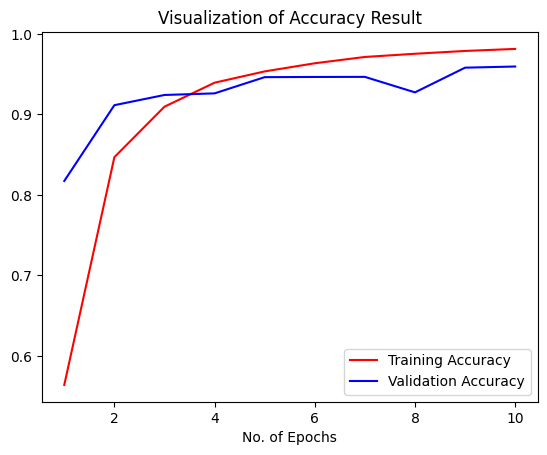

In [53]:

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [66]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 [==============================] - 23s 42ms/step


In [69]:

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [70]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [71]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

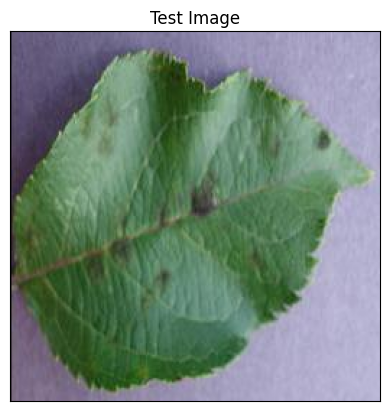

In [74]:
import cv2
image_path = '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [75]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 756ms/step


In [76]:
print(predictions)

[[0.00160832 0.0030707  0.00087459 0.02516137 0.00581982 0.01207033
  0.00619726 0.01115085 0.02828937 0.01098409 0.06741509 0.00270987
  0.02109035 0.00293515 0.02329239 0.00727707 0.00300593 0.02410804
  0.09135449 0.01452451 0.32187554 0.05271992 0.00162649 0.02187415
  0.00687682 0.01075049 0.12342555 0.0184898  0.00826767 0.00300362
  0.00327764 0.02708264 0.01550922 0.00166677 0.00227648 0.00376105
  0.01053554 0.00404099]]


In [77]:
result_index = np.argmax(predictions)
print(result_index)

20


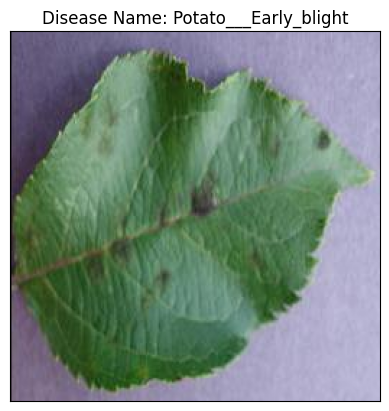

In [78]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()